<img src='11.jpg'>

In [3]:
#pip install pycaret
#Projeyi AutoMl ile çözeceğim için en başta colab da importları yaptık

In [4]:
import pandas as pd

In [5]:
#Regression AutoMl

In [6]:
from pycaret.regression import*

In [64]:
df=pd.read_csv("profiles.csv")

In [65]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60552 entries, 0 to 60551
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9514 non-null   float64
 1   body_type    8666 non-null   object 
 2   diet         5761 non-null   object 
 3   drinks       9012 non-null   object 
 4   drugs        7215 non-null   object 
 5   education    8459 non-null   object 
 6   essay0       8667 non-null   object 
 7   essay1       8347 non-null   object 
 8   essay2       8049 non-null   object 
 9   essay3       7690 non-null   object 
 10  essay4       7879 non-null   object 
 11  essay5       7814 non-null   object 
 12  essay6       7352 non-null   object 
 13  essay7       7553 non-null   object 
 14  essay8       6361 non-null   object 
 15  essay9       7554 non-null   object 
 16  ethnicity    8565 non-null   object 
 17  height       9514 non-null   float64
 18  income       9514 non-null   float64
 19  job 

In [67]:
df.isnull().sum()

age            51038
body_type      51886
diet           54791
drinks         51540
drugs          53337
education      52093
essay0         51885
essay1         52205
essay2         52503
essay3         52862
essay4         52673
essay5         52738
essay6         53200
essay7         52999
essay8         54191
essay9         52998
ethnicity      51987
height         51038
income         51038
job            52369
last_online    51038
location       51038
offspring      56666
orientation    51038
pets           54200
religion       54291
sex            51038
sign           52776
smokes         51956
speaks         51044
status         51038
dtype: int64

In [68]:
#İmporting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
##from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

## EDA Düzenlemeler

In [69]:
df.sample(7)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
6159,24.0,average,mostly anything,socially,NaN,graduated from college/university,um so i dunno what i'm exactly suppose to put ...,right now just working and getting myself read...,installing car audio systems. it's been a hobb...,i really don't know. maybe that i'm tall? or i...,"favorite books : big bad wolf, enders games, t...",music<br />\nadventures<br />\nsmart phone<br ...,the future and what i'd like to accomplish. wh...,recently i've been working a lot. so on friday...,NaN,you read everything i wrote.<br />\n<br />\nyo...,"black, other",72.0,-1.0,sales / marketing / biz dev,2012-06-26-07-31,"pacifica, california",NaN,straight,likes dogs,catholicism and somewhat serious about it,m,gemini and it&rsquo;s fun to think about,no,"english, other (fluently)",single
526,42.0,athletic,mostly anything,socially,never,dropped out of college/university,NaN,just opened up my 2nd restaurant with my busin...,making people smile and making sure they leave...,usually they notice i'm a big guy with presenc...,"im a total foodie. high brow, ghetto cheap, yo...","i cannot live without my family , my close fri...",i spend allot of time thinking about my parent...,lately i have been working late due to the bus...,big guys do cry. we won't admit it...but we do...,if your willing to meet a genuine nice / old s...,hispanic / latin,72.0,-1.0,other,2012-06-25-19-26,"san francisco, california",NaN,straight,NaN,other and laughing about it,m,cancer but it doesn&rsquo;t matter,no,english,single
10096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
#tekrarlanan satır sayısını bulmak için kullanılır.
df.duplicated().sum()


51037

In [71]:
#tekrar eden veriler çok onları drop etmeliyiz
df.drop_duplicates(inplace=True)

In [72]:
df.duplicated().sum()
#tekrar eden ifadeleri kaldırdık

0

In [73]:
df.shape

(9515, 31)

In [74]:
df.isnull().sum()

age               1
body_type       849
diet           3754
drinks          503
drugs          2300
education      1056
essay0          848
essay1         1168
essay2         1466
essay3         1825
essay4         1636
essay5         1701
essay6         2163
essay7         1962
essay8         3154
essay9         1961
ethnicity       950
height            1
income            1
job            1332
last_online       1
location          1
offspring      5629
orientation       1
pets           3163
religion       3254
sex               1
sign           1739
smokes          919
speaks            7
status            1
dtype: int64

In [75]:
df.describe()

,age,height,income
count,9514.000000,9514.000000,9514.000000
mean,32.084192,68.337398,18887.145155
std,9.445488,3.905229,91428.807808
min,18.000000,36.000000,-1.000000
25%,25.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,36.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [76]:
df.corr()

,age,height,income
age,1.000000,-0.022078,0.011424
height,-0.022078,1.000000,0.073105
income,0.011424,0.073105,1.000000


In [77]:
#regression ve classification için boşlukları doldurmalı ve objectleri inte ve floata cevirmeliyiz

In [78]:
kaldır=['essay0',  'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']
df.drop(kaldır, inplace=True, axis=1)

In [79]:
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [80]:
df.isnull().mean().sort_values(ascending=False) #boş verilerin yüzdesi büyükten küçüğe

offspring      0.591592
diet           0.394535
religion       0.341986
pets           0.332422
drugs          0.241724
sign           0.182764
job            0.139989
education      0.110983
ethnicity      0.099842
smokes         0.096584
body_type      0.089228
drinks         0.052864
speaks         0.000736
age            0.000105
sex            0.000105
last_online    0.000105
orientation    0.000105
location       0.000105
income         0.000105
height         0.000105
status         0.000105
dtype: float64

In [81]:
df.drinks.value_counts().sort_values(ascending=False)  #içmek

socially       6679
rarely          911
often           809
not at all      509
very often       54
desperately      50
Name: drinks, dtype: int64

In [82]:
df.drugs.value_counts().sort_values(ascending=False)  #ilaç

never        5972
sometimes    1181
often          62
Name: drugs, dtype: int64

In [83]:
df.smokes.value_counts().sort_values(ascending=False) #sigara kullanımı

no                7011
sometimes          565
when drinking      480
yes                307
trying to quit     233
Name: smokes, dtype: int64

In [84]:

df["drinks"]=df["drinks"].map({"not at all":0, "rarely":1, "socially":2, "often":3, "very often":4, "desperately":5})
df["drugs"] = df["drugs"].map({"never":0, "sometimes":1, "often":2})
df["smokes"] = df["smokes"].map({"no":0, "trying to quit":1, "sometimes":2, "when drinking":3, "yes":4})

In [85]:
df["drinks"] = df["drinks"].fillna("0")
df["drugs"] = df["drugs"].fillna("0")
df["smokes"] = df["smokes"].fillna("0")

In [86]:
df.isnull().sum()

age               1
body_type       849
diet           3754
drinks            0
drugs             0
education      1056
ethnicity       950
height            1
income            1
job            1332
last_online       1
location          1
offspring      5629
orientation       1
pets           3163
religion       3254
sex               1
sign           1739
smokes            0
speaks            7
status            1
dtype: int64

In [87]:
df.body_type.value_counts().sort_values(ascending=False) #vücüt tiplerini sadeleştirelim

average           2274
fit               2040
athletic          1888
thin               740
curvy              626
a little extra     430
skinny             269
full figured       181
overweight          69
jacked              64
used up             47
rather not say      38
Name: body_type, dtype: int64

In [117]:
new_body_type={"average":"fit",
              "fit":"fit",
              "athletic":"fit",
              "thin":"fit",
              "curvy":"curvy",
              "a little extra":"curvy",
              "skinny":"fit",
              "full figured":"curvy",
              "overweight":"bad",
              "jacked":"bad",
              "used up":"bad",
              "rather not say":"curvy"
             }
df.body_type.replace(new_body_type,inplace=True)

<Axes: xlabel='body_type', ylabel='count'>

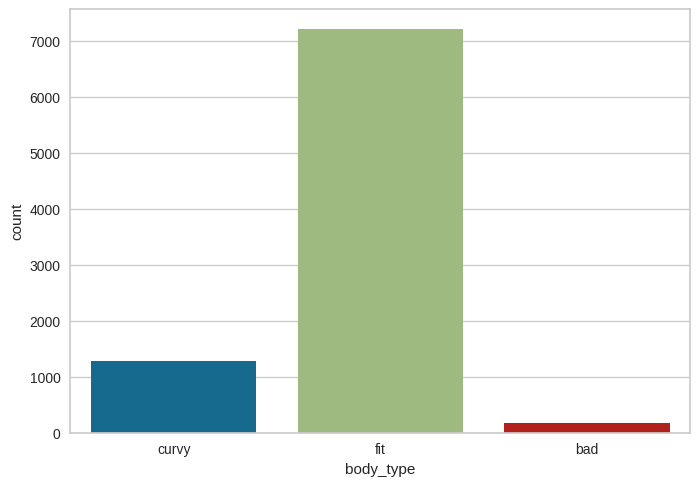

In [119]:
sns.countplot(x=df["body_type"])

In [89]:
df.diet.value_counts().sort_values(ascending=False)  #yeme kültürü

mostly anything        2621
anything               1067
strictly anything       835
mostly vegetarian       568
mostly other            154
strictly vegetarian     135
vegetarian              111
strictly other           64
other                    52
mostly vegan             52
strictly vegan           40
vegan                    28
mostly halal             13
mostly kosher            12
strictly halal            4
strictly kosher           2
kosher                    2
halal                     1
Name: diet, dtype: int64

In [104]:
df['diet']=df.diet.replace({'mostly':'', 'strictly':''}, regex=True).str.strip()

## Baştaki Çoğunlukla veya Kesinlikle bilg. kaldırıyoruz.

In [91]:
df.diet.value_counts().sort_values(ascending=False)  #yeme kültürü

anything      4523
vegetarian     814
other          270
vegan          120
halal           18
kosher          16
Name: diet, dtype: int64

<Axes: xlabel='diet', ylabel='count'>

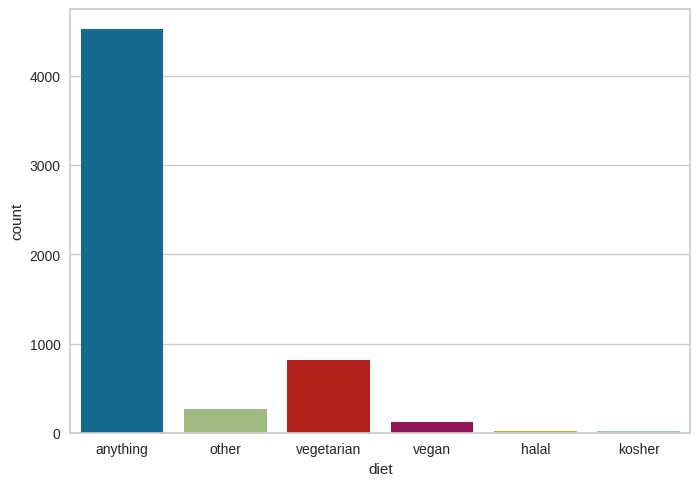

In [115]:
sns.countplot(x=df["diet"])

In [92]:
df.education.value_counts().sort_values(ascending=False)

graduated from college/university    3770
graduated from masters program       1402
working on college/university         969
working on masters program            251
graduated from two-year college       245
graduated from high school            205
graduated from ph.d program           203
graduated from law school             177
working on two-year college           159
working on ph.d program               159
dropped out of college/university     149
college/university                    134
graduated from space camp             104
dropped out of space camp              87
graduated from med school              73
working on space camp                  73
working on law school                  55
two-year college                       43
working on med school                  41
dropped out of two-year college        34
masters program                        21
working on high school                 20
dropped out of ph.d program            19
dropped out of masters program    

In [93]:
df["education"].replace({"working on":"student","graduated from":"graduated","dropped out":"dropped"},regex=True)
df["education"]=df["education"].str.split().str[0]
df["education"].replace({"college/university":"student","two-year":"student","masters":"student","working":"student","space":"student"},regex=True)

0         student
1         student
2       graduated
3         student
4       graduated
          ...    
9510          NaN
9511      dropped
9512      student
9513    graduated
9514          NaN
Name: education, Length: 9515, dtype: object

In [94]:
df.isnull().sum()

age               1
body_type       849
diet           3754
drinks            0
drugs             0
education      1056
ethnicity       950
height            1
income            1
job            1332
last_online       1
location          1
offspring      5629
orientation       1
pets           3163
religion       3254
sex               1
sign           1739
smokes            0
speaks            7
status            1
dtype: int64

In [95]:
df.education.value_counts().sort_values(ascending=False)

graduated             6179
working               1727
dropped                323
college/university     134
two-year                43
masters                 21
high                    13
space                   10
ph.d                     5
law                      4
Name: education, dtype: int64

<Axes: xlabel='education', ylabel='count'>

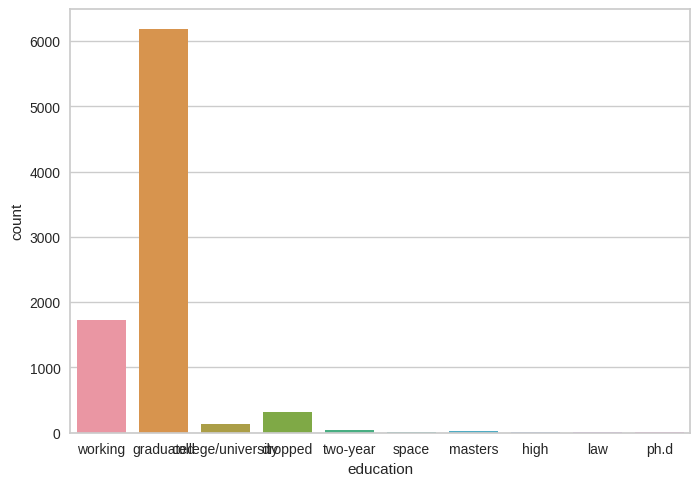

In [113]:
sns.countplot(x=df["education"])

In [96]:
df.job.value_counts().sort_values(ascending=False)

other                                1153
student                               807
science / tech / engineering          780
artistic / musical / writer           715
computer / hardware / software        709
sales / marketing / biz dev           709
medicine / health                     613
education / academia                  538
executive / management                378
entertainment / media                 356
banking / financial / real estate     353
hospitality / travel                  217
law / legal services                  200
construction / craftsmanship          178
clerical / administrative             117
political / government                105
rather not say                         68
transportation                         64
unemployed                             56
retired                                38
military                               29
Name: job, dtype: int64

<Axes: >

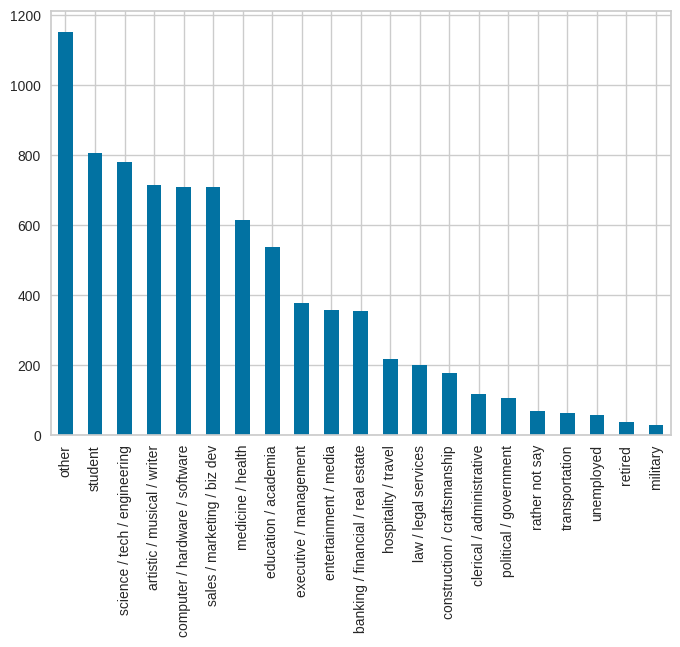

In [97]:
df["job"].value_counts().plot.bar()

In [98]:
df["religion"]=df["religion"].str.split().str[0]
 #"religion" sütunundaki değerleri boşluk karakterine göre böler ve her bir değer için sadece ilk kelimeyi alarak "religion" sütununu günceller

In [99]:
df.religion.value_counts().sort_values(ascending=False)

agnosticism     1381
other           1193
atheism         1131
christianity     905
catholicism      762
judaism          490
buddhism         288
hinduism          82
islam             29
Name: religion, dtype: int64

<Axes: >

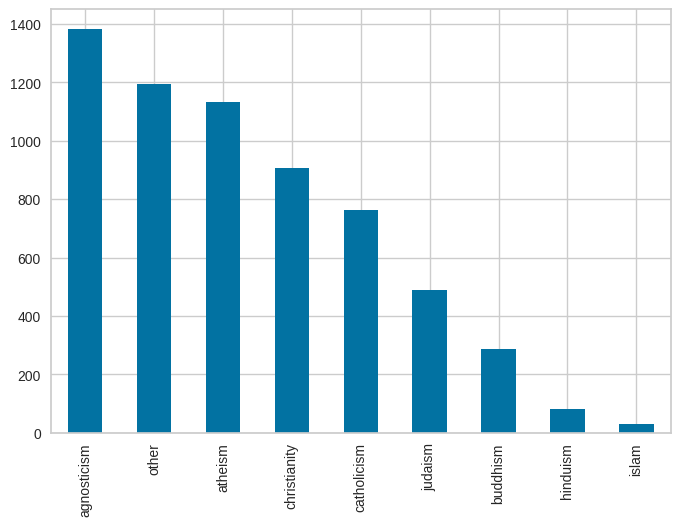

In [100]:
df["religion"].value_counts().plot.bar()

In [101]:
df.isnull().sum()

age               1
body_type       849
diet           3754
drinks            0
drugs             0
education      1056
ethnicity       950
height            1
income            1
job            1332
last_online       1
location          1
offspring      5629
orientation       1
pets           3163
religion       3254
sex               1
sign           1739
smokes            0
speaks            7
status            1
dtype: int64

In [103]:
df['speaks'].unique()

array(['english', 'english (fluently), spanish (poorly), french (poorly)',
       'english, french, c++', ...,
       'english (fluently), french (okay), spanish (poorly), sign language (poorly)',
       'english (fluently), spanish, swedish',
       'english (fluently), french (okay), swedish (poorly)'],
      dtype=object)

In [105]:
df["number_of_fluent_languages"]=df.speaks.str.count("fluently")
df["number_of_fluent_languages"].replace(0,1,regex=True,inplace=True)
df["number_of_poorly_languages"]=df.speaks.str.count("poorly")
df.drop("speaks",axis=1,inplace=True)

In [106]:
df

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,status,number_of_fluent_languages,number_of_poorly_languages
0,22.0,curvy,anything,2.0,0.0,working,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism,m,gemini,2.0,single,1.0,0.0
1,35.0,fit,other,3.0,1.0,working,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism,m,cancer,0.0,single,1.0,2.0
2,38.0,fit,anything,2.0,0,graduated,NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,0.0,available,1.0,0.0
3,23.0,fit,vegetarian,2.0,0,working,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,0.0,single,1.0,1.0
4,29.0,fit,NaN,2.0,0.0,graduated,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,0.0,single,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9510,31.0,fit,anything,2.0,1.0,NaN,white,72.0,-1.0,hospitality / travel,2012-04-05-21-46,"san francisco, california",NaN,gay,NaN,atheism,m,scorpio but it doesn&rsquo;t matter,2.0,single,1.0,0.0
9511,34.0,fit,NaN,2.0,0,dropped,white,71.0,-1.0,hospitality / travel,2012-04-28-12-42,"san francisco, california",doesn&rsquo;t want kids,gay,likes dogs and has cats,atheism,m,leo and it&rsquo;s fun to think about,3.0,single,1.0,0.0
9512,29.0,fit,anything,1.0,0.0,two-year,white,70.0,-1.0,NaN,2012-03-01-15-17,"san francisco, california","doesn&rsquo;t have kids, and doesn&rsquo;t wan...",gay,likes dogs and has cats,NaN,m,aries,0.0,single,1.0,1.0
9513,49.0,bad,NaN,1.0,0.0,graduated,white,64.0,-1.0,rather not say,2012-06-14-15-14,"castro valley, california",NaN,straight,likes dogs and likes cats,NaN,f,pisces and it&rsquo;s fun to think about,0.0,single,1.0,0.0


<Axes: xlabel='number_of_poorly_languages', ylabel='count'>

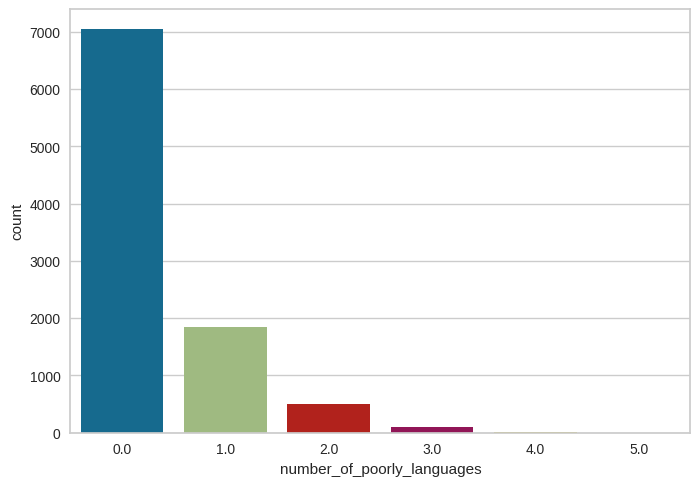

In [109]:
sns.countplot(x=df["number_of_poorly_languages"])

<Axes: xlabel='number_of_fluent_languages', ylabel='count'>

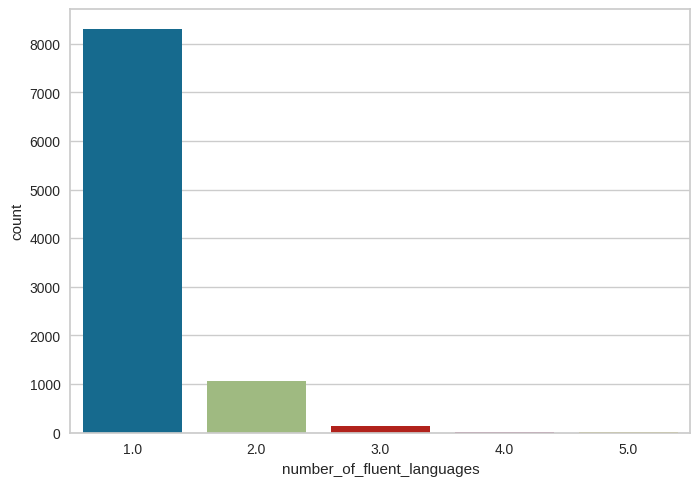

In [111]:
sns.countplot(x=df["number_of_fluent_languages"])

<Axes: >

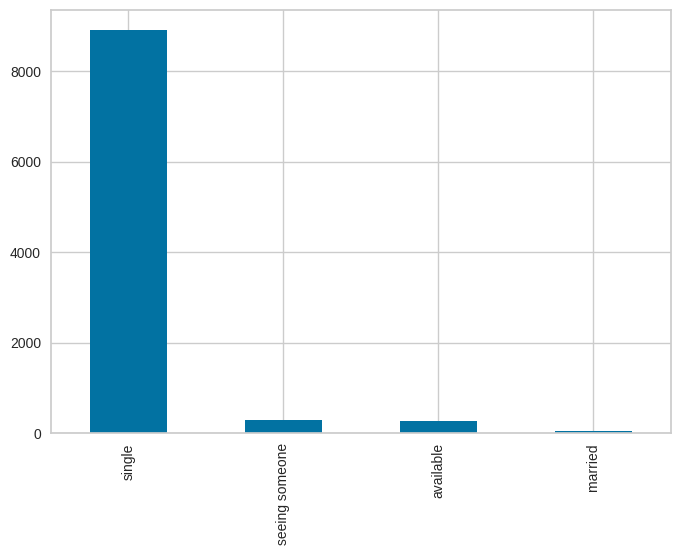

In [112]:
df.status.value_counts().plot.bar()

In [120]:
#hayvanın türü değil sahip olup olmadığı Önemli
df['has_animals'] = df.pets.str.contains('has')

In [121]:
df.pets.str.contains('1', na=True)

0       False
1       False
2       False
3       False
4       False
        ...  
9510     True
9511    False
9512    False
9513    False
9514     True
Name: pets, Length: 9515, dtype: bool

In [123]:
df['has_animals'].unique()

array([False, True, nan], dtype=object)

In [122]:
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,status,number_of_fluent_languages,number_of_poorly_languages,has_animals
0,22.0,curvy,anything,2.0,0.0,working,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism,m,gemini,2.0,single,1.0,0.0,False
1,35.0,fit,other,3.0,1.0,working,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism,m,cancer,0.0,single,1.0,2.0,False
2,38.0,fit,anything,2.0,0,graduated,NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,0.0,available,1.0,0.0,True
3,23.0,fit,vegetarian,2.0,0,working,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,0.0,single,1.0,1.0,False
4,29.0,fit,NaN,2.0,0.0,graduated,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,0.0,single,1.0,0.0,False


In [124]:
df.drop("pets",axis=1,inplace=True)

In [125]:
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,religion,sex,sign,smokes,status,number_of_fluent_languages,number_of_poorly_languages,has_animals
0,22.0,curvy,anything,2.0,0.0,working,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,agnosticism,m,gemini,2.0,single,1.0,0.0,False
1,35.0,fit,other,3.0,1.0,working,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,agnosticism,m,cancer,0.0,single,1.0,2.0,False
2,38.0,fit,anything,2.0,0,graduated,NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,NaN,m,pisces but it doesn&rsquo;t matter,0.0,available,1.0,0.0,True
3,23.0,fit,vegetarian,2.0,0,working,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,NaN,m,pisces,0.0,single,1.0,1.0,False
4,29.0,fit,NaN,2.0,0.0,graduated,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,NaN,m,aquarius,0.0,single,1.0,0.0,False


In [126]:
#çocuğa sahip mi değil mi
df['has_kids'] = df.offspring.str.contains('has')

In [127]:
df.offspring.str.contains('1', na=True)

0       False
1       False
2        True
3       False
4        True
        ...  
9510     True
9511    False
9512    False
9513     True
9514     True
Name: offspring, Length: 9515, dtype: bool

In [128]:
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,religion,sex,sign,smokes,status,number_of_fluent_languages,number_of_poorly_languages,has_animals,has_kids
0,22.0,curvy,anything,2.0,0.0,working,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,agnosticism,m,gemini,2.0,single,1.0,0.0,False,False
1,35.0,fit,other,3.0,1.0,working,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,agnosticism,m,cancer,0.0,single,1.0,2.0,False,False
2,38.0,fit,anything,2.0,0,graduated,NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,NaN,m,pisces but it doesn&rsquo;t matter,0.0,available,1.0,0.0,True,NaN
3,23.0,fit,vegetarian,2.0,0,working,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,NaN,m,pisces,0.0,single,1.0,1.0,False,False
4,29.0,fit,NaN,2.0,0.0,graduated,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,NaN,m,aquarius,0.0,single,1.0,0.0,False,NaN


In [129]:
df.drop("offspring",axis=1,inplace=True)

In [130]:
df.sample()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,orientation,religion,sex,sign,smokes,status,number_of_fluent_languages,number_of_poorly_languages,has_animals,has_kids
4361,24.0,fit,anything,2.0,0,graduated,white,69.0,-1.0,science / tech / engineering,2012-06-29-22-18,"san francisco, california",bisexual,atheism,f,NaN,2.0,single,1.0,0.0,NaN,False


In [131]:
#classification için jenerasyon sutunu tanımlayıp, ekliyoruz

In [132]:
# 0: Millenial: 18-32, Gen X-er: 33-47, Boomers:48-70
df.loc[df[df.age<=70].index, 'generation'] = 'Boomers'
df.loc[df[df.age<=47].index, 'generation'] = 'Gen X-er'
df.loc[df[df.age<=32].index, 'generation'] = 'Millennial'

In [133]:
df.sample(5)

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,orientation,religion,sex,sign,smokes,status,number_of_fluent_languages,number_of_poorly_languages,has_animals,has_kids,generation
1641,32.0,fit,anything,1.0,0.0,graduated,hispanic / latin,68.0,80000.0,computer / hardware / software,2012-06-29-00-00,"oakland, california",straight,NaN,m,scorpio but it doesn&rsquo;t matter,0.0,single,2.0,0.0,False,NaN,Millennial
533,28.0,fit,anything,2.0,0,graduated,asian,69.0,-1.0,other,2012-06-29-03-55,"san francisco, california",straight,other,f,aries and it&rsquo;s fun to think about,2.0,single,1.0,0.0,NaN,True,Millennial
4024,41.0,fit,anything,2.0,0.0,graduated,white,66.0,-1.0,executive / management,2012-06-20-23-02,"san francisco, california",straight,NaN,f,scorpio but it doesn&rsquo;t matter,0.0,single,1.0,2.0,NaN,NaN,Gen X-er
7449,38.0,fit,anything,2.0,0.0,graduated,pacific islander,60.0,-1.0,NaN,2012-06-23-00-03,"san francisco, california",straight,christianity,f,taurus and it&rsquo;s fun to think about,0.0,single,1.0,2.0,True,False,Gen X-er
8329,31.0,fit,anything,1.0,1.0,NaN,white,71.0,-1.0,construction / craftsmanship,2012-06-29-10-02,"san francisco, california",gay,NaN,m,libra,4.0,single,1.0,0.0,False,False,Millennial


<Axes: >

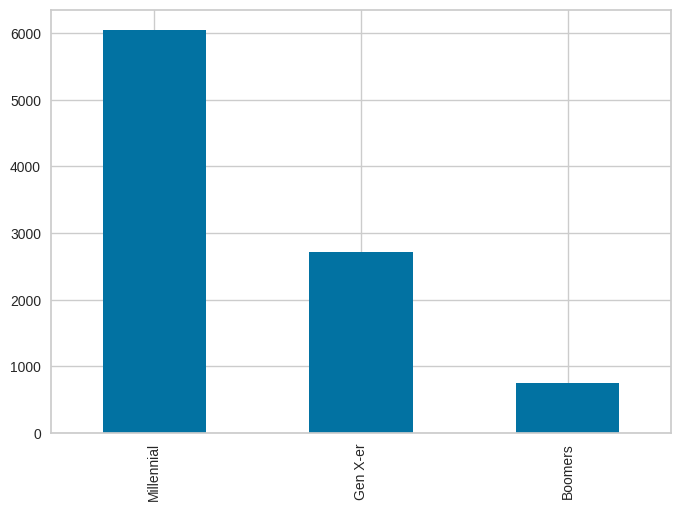

In [134]:
df["generation"].value_counts().plot.bar()

<Axes: >

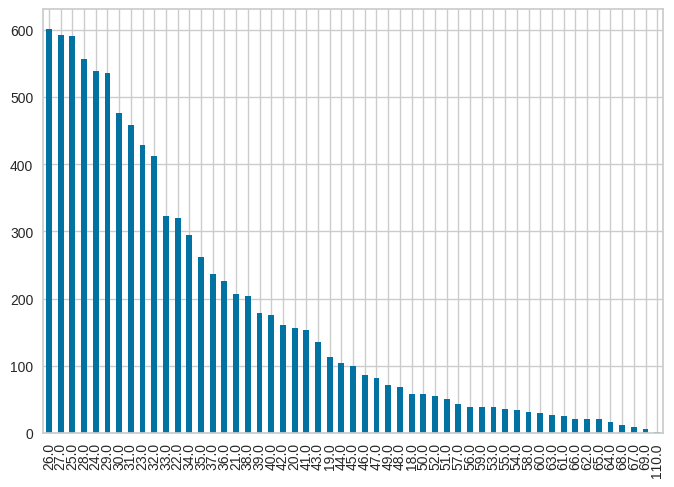

In [135]:
df.age.value_counts().plot.bar()

In [136]:
#bir veri çerçevesindeki tüm NaN (boş) değerleri her sütundaki en yaygın değerle doldurmak için kullanılır
df=df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [137]:
df.isnull().sum()

age                           0
body_type                     0
diet                          0
drinks                        0
drugs                         0
education                     0
ethnicity                     0
height                        0
income                        0
job                           0
last_online                   0
location                      0
orientation                   0
religion                      0
sex                           0
sign                          0
smokes                        0
status                        0
number_of_fluent_languages    0
number_of_poorly_languages    0
has_animals                   0
has_kids                      0
generation                    0
dtype: int64

In [1]:
#AUTO ML İLE İLGİLİ İLK KODLARI EN BAŞTA İMPORT ETTİK
#AŞAĞIDA DEVAMI VE ÇÖZÜM VAR

In [138]:
setup(data=df,target='age')

,Description,Value
0,Session id,494
1,Target,age
2,Target type,Regression
3,Original data shape,"(9515, 23)"
4,Transformed data shape,"(9515, 88)"
5,Transformed train set shape,"(6660, 88)"
6,Transformed test set shape,"(2855, 88)"
7,Ordinal features,1
8,Numeric features,4
9,Categorical features,16


In [139]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,3.1877,14.9581,3.8667,0.8332,0.1209,0.1051,0.7670
gbr,Gradient Boosting Regressor,3.4192,18.3128,4.2650,0.7970,0.1346,0.1153,1.6360
lightgbm,Light Gradient Boosting Machine,3.4156,18.3585,4.2620,0.7969,0.1329,0.1143,1.2280
et,Extra Trees Regressor,3.4107,18.3812,4.2832,0.7955,0.1339,0.1142,4.9920
rf,Random Forest Regressor,3.5114,19.3843,4.3625,0.7861,0.1356,0.1170,4.1320
xgboost,Extreme Gradient Boosting,4.0110,24.9003,4.9679,0.7224,0.1583,0.1392,0.8500
lr,Linear Regression,3.8535,25.8378,5.0790,0.7124,0.1489,0.1254,1.3060
ridge,Ridge Regression,3.8593,25.9374,5.0888,0.7113,0.1491,0.1255,0.5840
br,Bayesian Ridge,3.8722,26.1481,5.1094,0.7089,0.1496,0.1259,0.6410
omp,Orthogonal Matching Pursuit,3.9956,27.8891,5.2773,0.6894,0.1546,0.1302,0.4310


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
#ADABOOSTREGRESSİON MODELİNE GÖRE YAŞ DOĞRU  TAHMİN ETME ORANI %83

In [140]:
#Classification

In [141]:
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,religion,sex,sign,smokes,status,number_of_fluent_languages,number_of_poorly_languages,has_animals,has_kids,generation
0,22.0,curvy,anything,2.0,0.0,working,"asian, white",75.0,-1.0,transportation,...,agnosticism,m,gemini,2.0,single,1.0,0.0,False,False,Millennial
1,35.0,fit,other,3.0,1.0,working,white,70.0,80000.0,hospitality / travel,...,agnosticism,m,cancer,0.0,single,1.0,2.0,False,False,Gen X-er
2,38.0,fit,anything,2.0,0,graduated,white,68.0,-1.0,other,...,agnosticism,m,pisces but it doesn&rsquo;t matter,0.0,available,1.0,0.0,True,False,Gen X-er
3,23.0,fit,vegetarian,2.0,0,working,white,71.0,20000.0,student,...,agnosticism,m,pisces,0.0,single,1.0,1.0,False,False,Millennial
4,29.0,fit,anything,2.0,0.0,graduated,"asian, black, other",66.0,-1.0,artistic / musical / writer,...,agnosticism,m,aquarius,0.0,single,1.0,0.0,False,False,Millennial


In [142]:
from pycaret.classification import*

In [144]:
##'Boomers' 'Gen X-er' 'Millennial'

df['generation'].replace('Boomers',0,inplace=True)
df['generation'].replace('Gen X-er',1,inplace=True)
df['generation'].replace('Millennial',2,inplace=True)

In [145]:
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,religion,sex,sign,smokes,status,number_of_fluent_languages,number_of_poorly_languages,has_animals,has_kids,generation
0,22.0,curvy,anything,2.0,0.0,working,"asian, white",75.0,-1.0,transportation,...,agnosticism,m,gemini,2.0,single,1.0,0.0,False,False,2
1,35.0,fit,other,3.0,1.0,working,white,70.0,80000.0,hospitality / travel,...,agnosticism,m,cancer,0.0,single,1.0,2.0,False,False,1
2,38.0,fit,anything,2.0,0,graduated,white,68.0,-1.0,other,...,agnosticism,m,pisces but it doesn&rsquo;t matter,0.0,available,1.0,0.0,True,False,1
3,23.0,fit,vegetarian,2.0,0,working,white,71.0,20000.0,student,...,agnosticism,m,pisces,0.0,single,1.0,1.0,False,False,2
4,29.0,fit,anything,2.0,0.0,graduated,"asian, black, other",66.0,-1.0,artistic / musical / writer,...,agnosticism,m,aquarius,0.0,single,1.0,0.0,False,False,2


In [158]:
df.to_csv("generation.csv",index=False)

In [146]:
setup(df,target='generation')

,Description,Value
0,Session id,5544
1,Target,generation
2,Target type,Multiclass
3,Original data shape,"(9515, 23)"
4,Transformed data shape,"(9515, 86)"
5,Transformed train set shape,"(6660, 86)"
6,Transformed test set shape,"(2855, 86)"
7,Ordinal features,1
8,Numeric features,5
9,Categorical features,15


In [147]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.5260
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.8110
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.9970
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.8590
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.2550
rf,Random Forest Classifier,0.9889,1.0000,0.9889,0.9895,0.9883,0.9780,0.9783,0.9150
knn,K Neighbors Classifier,0.9851,0.9987,0.9851,0.9852,0.9851,0.9706,0.9706,0.5120
nb,Naive Bayes,0.9628,0.9944,0.9628,0.9641,0.9621,0.9249,0.9272,0.5220
lr,Logistic Regression,0.9303,0.9895,0.9303,0.9303,0.9302,0.8623,0.8625,1.1270
et,Extra Trees Classifier,0.8710,0.9610,0.8710,0.8709,0.8660,0.7355,0.7384,1.2960


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=5544, splitter='best')

In [148]:
best_model=create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

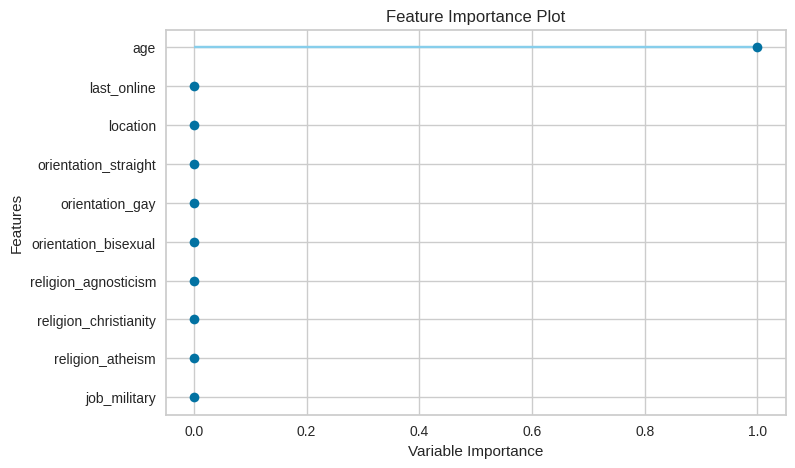

In [149]:
plot_model(best_model,plot='feature')

In [2]:
#İLK 5 CLASSİFİCATİON MODELİNE GÖRE JENERASYON DOĞRU  TAHMİN ETME ORANI %100

In [3]:
#BİR DE CLUSTER YAPMAK İSTEDİM. UZUN SÜRSEDE SONUÇ GÜZEL ÇIKTI

In [150]:
# Clustering

In [151]:
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,religion,sex,sign,smokes,status,number_of_fluent_languages,number_of_poorly_languages,has_animals,has_kids,generation
0,22.0,curvy,anything,2.0,0.0,working,"asian, white",75.0,-1.0,transportation,...,agnosticism,m,gemini,2.0,single,1.0,0.0,False,False,2
1,35.0,fit,other,3.0,1.0,working,white,70.0,80000.0,hospitality / travel,...,agnosticism,m,cancer,0.0,single,1.0,2.0,False,False,1
2,38.0,fit,anything,2.0,0,graduated,white,68.0,-1.0,other,...,agnosticism,m,pisces but it doesn&rsquo;t matter,0.0,available,1.0,0.0,True,False,1
3,23.0,fit,vegetarian,2.0,0,working,white,71.0,20000.0,student,...,agnosticism,m,pisces,0.0,single,1.0,1.0,False,False,2
4,29.0,fit,anything,2.0,0.0,graduated,"asian, black, other",66.0,-1.0,artistic / musical / writer,...,agnosticism,m,aquarius,0.0,single,1.0,0.0,False,False,2


In [152]:
from pycaret.clustering import*

In [153]:
setup(df)

,Description,Value
0,Session id,7913
1,Original data shape,"(9515, 23)"
2,Transformed data shape,"(9515, 7094)"
3,Ordinal features,1
4,Numeric features,6
5,Categorical features,15
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


In [154]:
kmeans=create_model('kmeans',4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9004,164030.3358,0.3988,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [155]:
plot_model(kmeans)

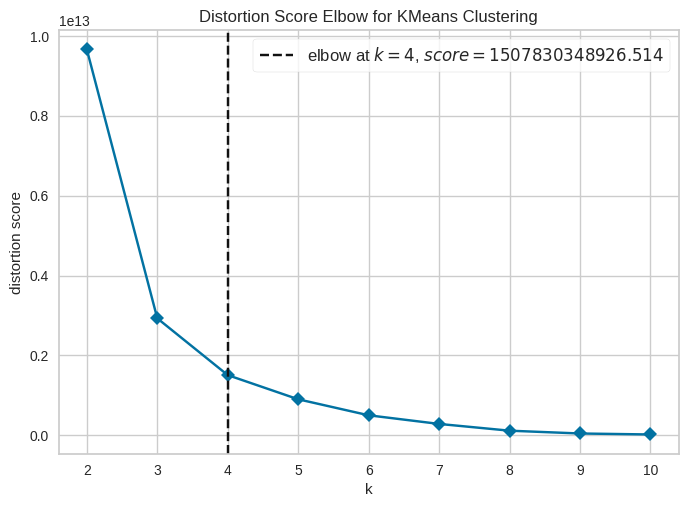

In [156]:
plot_model(kmeans,plot='elbow')

In [157]:
plot_model(kmeans,plot='tsne')